<a href="https://colab.research.google.com/github/gustavohroos/NLP/blob/main/Trabalho_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tradução automática: O quão diferentes podem ser as traduções dos modelos? (Quando enfrentam um dos clássicos problemas da tradução)

Autores: [Gustavo Roos](https://github.com/gustavohroos) e [Leonardo Marotta](https://github.com/LeoMarotta)


Da biblioteca do Hugging Face, importamos "mBART-50 many to many multilingual machine translation" para carregar o modelo pré treinado e o seu tokenizador correspondente. Como o nome do modelo sugere, é possivel traduzir diretamente entre qualquer par de 50 idiomas.

In [1]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

Aqui é inserido o texto que é desejada a tradução.

In [2]:
text = "Sinto saudades."
resultadoEsperadoEng = "I miss you."
resultadoEsperadoSpa = "Echo de menos."

Sobre o código a seguir, temos dois trechos semelhantes, um traduzindo para português e outro para espanhol.



As linhas quem contém "tokenizer.src_lang = " servem para informar a linguagem de origem do texto.

Nas linhas com ``encoded_text = tokenizer(article_pt, return_tensors="pt")``, estamos usando o tokenizador para converter o texto inserido para uma representação númerica em tensores PyTorch.

Aqui ``generated_tokens = model.generate(**encoded_text, forced_bos_token_id=tokenizer.lang_code_to_id["pt_XX"])``, estamos usando o modelo para gerar tokens. Estamos forçando o ID do token de início ``("forced_bos_token_id")`` para inglês ``("en_XX")``. Isso significa que o modelo gerará a tradução começando com o token correspondente ao início de uma sequência em inglês.

Finalmente, na hora de imprimir na tela, temos ``tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)`` significando que queremos pular a decodificação de tokens especiais durante o processo de reconversão dos tokens gerados de volta para texto legível.

In [3]:
tokenizer.src_lang = "pt_XX"

encoded_text = tokenizer(text, return_tensors="pt")

generated_tokens = model.generate(
    **encoded_text,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)

print(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
mBartEng = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

generated_tokens = model.generate(
    **encoded_text,
    forced_bos_token_id=tokenizer.lang_code_to_id["es_XX"]
)

print(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
mBartSpa = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

['I feel healthy.']
['Sinto de salud.']


In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [5]:
tokenizer.src_lang = "pt_BR"
text_to_translate = "Sinto saudades."
model_inputs = tokenizer(text_to_translate, return_tensors="pt")


gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.lang_code_to_id["eng_Latn"])
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))
NLLBeng = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)

gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.lang_code_to_id['spa_Latn'])
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))
NLLBspa = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)

the `lang_code_to_id` attribute is deprecated. The logic is natively handled in the `tokenizer.adder_tokens_decoder` this attribute will be removed in `transformers` v4.38


["I'm not missing you."]
['No hay saudades.']


In [6]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

tokenizer_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/756k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [7]:
text_to_translate = "Sinto saudades."
model_inputs = tokenizer(text_to_translate, return_tensors="pt")
output = model.generate(**model_inputs)
print(tokenizer.batch_decode(output, skip_special_tokens=True))
unicampEng = tokenizer.batch_decode(output, skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['I feel saudades.']


O Assistente de Avaliação Bilíngue, do inglês Bilingual Evaluation Understudy mais conhecido pela sigla BLEU, é um algoritmo que avalia a qualidade do texto que foi traduzido automaticamente de um idioma natural para outro. A qualidade considera a correspondência entre o resultado de uma máquina e o de um ser humano: "quanto mais próxima uma tradução automática estiver de uma tradução humana profissional, melhor ela é" - essa é a ideia central por trás do BLEU.

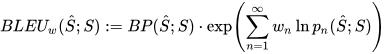

In [8]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

import spacy

def preprocess(sentence):
    nlp = spacy.load("en_core_web_sm")
    tokens = [token.text for token in nlp(sentence)]

    return tokens


resultadoEsperadoEng_tokens = preprocess(resultadoEsperadoEng)
resultadoEsperadoSpa_tokens = preprocess(resultadoEsperadoSpa)
mBartEng_tokens = preprocess(*mBartEng)
mBartSpa_tokens = preprocess(*mBartSpa)
NLLBeng_tokens = preprocess(*NLLBeng)
NLLBspa_tokens = preprocess(*NLLBspa)
unicampEng_tokens = preprocess(*unicampEng)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [mBartEng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> mBartEng):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoSpa_tokens]], [mBartSpa_tokens])
print('Corpus BLEU Score (resultadoEsperadoSpa <-> mBartSpa):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [NLLBeng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> NLLBeng):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoSpa_tokens]], [NLLBspa_tokens])
print('Corpus BLEU Score (resultadoEsperadoSpa <-> NLLBspa):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [unicampEng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> unicampEng):', corpus_bleu_score)

Corpus BLEU Score (resultadoEsperadoEng <-> mBartEng): 1.5319719891192393e-231
Corpus BLEU Score (resultadoEsperadoSpa <-> mBartSpa): 1.5319719891192393e-231
Corpus BLEU Score (resultadoEsperadoEng <-> NLLBeng): 8.38826642100846e-155
Corpus BLEU Score (resultadoEsperadoSpa <-> NLLBspa): 1.2882297539194154e-231
Corpus BLEU Score (resultadoEsperadoEng <-> unicampEng): 1.5319719891192393e-231


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [9]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

In [10]:
text = "Eu gosto de comer maçãs e bananas."
resultadoEsperadoEng = "I like to eat apples and bananas."
resultadoEsperadoSpa = "Me gusta comer manzanas y plátanos."

In [11]:
tokenizer.src_lang = "pt_XX"

encoded_text = tokenizer(text, return_tensors="pt")

generated_tokens = model.generate(
    **encoded_text,
    forced_bos_token_id=tokenizer.lang_code_to_id["en_XX"]
)

print(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
mBartEng = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

generated_tokens = model.generate(
    **encoded_text,
    forced_bos_token_id=tokenizer.lang_code_to_id["es_XX"]
)

print(tokenizer.batch_decode(generated_tokens, skip_special_tokens=True))
mBartSpa = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

['I like eating apples and bananas.']
['Yo, yo, yo, yo, yo, yo.']


In [12]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")

In [13]:
tokenizer.src_lang = "pt_BR"
model_inputs = tokenizer(text, return_tensors="pt")


gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.lang_code_to_id["eng_Latn"])
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))
NLLBeng = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)

gen_tokens = model.generate(**model_inputs, forced_bos_token_id=tokenizer.lang_code_to_id['spa_Latn'])
print(tokenizer.batch_decode(gen_tokens, skip_special_tokens=True))
NLLBspa = tokenizer.batch_decode(gen_tokens, skip_special_tokens=True)

['I like to eat apples and bananas.']
['Me gusta comer manzanas y plátanos.']


In [14]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("unicamp-dl/translation-pt-en-t5")
model = AutoModelForSeq2SeqLM.from_pretrained("unicamp-dl/translation-pt-en-t5")

In [15]:
model_inputs = tokenizer(text, return_tensors="pt")
output = model.generate(**model_inputs)
print(tokenizer.batch_decode(output, skip_special_tokens=True))
unicampEng = tokenizer.batch_decode(output, skip_special_tokens=True)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


['I like to eat apples and bananas.']


In [16]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

import spacy
from spacy.lang.en.examples import sentences

def preprocess(sentence):
    nlp = spacy.load("en_core_web_sm")
    tokens = [token.text for token in nlp(sentence)]
    return tokens

resultadoEsperadoEng_tokens = preprocess(resultadoEsperadoEng)
resultadoEsperadoSpa_tokens = preprocess(resultadoEsperadoSpa)
mBartEng_tokens = preprocess(*mBartEng)
mBartSpa_tokens = preprocess(*mBartSpa)
NLLBeng_tokens = preprocess(*NLLBeng)
NLLBspa_tokens = preprocess(*NLLBspa)
unicampEng_tokens = preprocess(*unicampEng)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [mBartEng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> mBartEng):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoSpa_tokens]], [mBartSpa_tokens])
print('Corpus BLEU Score (resultadoEsperadoSpa <-> mBartSpa):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [NLLBeng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> NLLBeng):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoSpa_tokens]], [NLLBspa_tokens])
print('Corpus BLEU Score (resultadoEsperadoSpa <-> NLLBspa):', corpus_bleu_score)

corpus_bleu_score = corpus_bleu([[resultadoEsperadoEng_tokens]], [unicampEng_tokens])
print('Corpus BLEU Score (resultadoEsperadoEng <-> unicampEng):', corpus_bleu_score)

Corpus BLEU Score (resultadoEsperadoEng <-> mBartEng): 0.42383656282787796
Corpus BLEU Score (resultadoEsperadoSpa <-> mBartSpa): 9.788429383461836e-232
Corpus BLEU Score (resultadoEsperadoEng <-> NLLBeng): 1.0
Corpus BLEU Score (resultadoEsperadoSpa <-> NLLBspa): 1.0
Corpus BLEU Score (resultadoEsperadoEng <-> unicampEng): 1.0
